# Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Input data

In [2]:
#train data
titanic = pd.read_csv("/kaggle/input/titanic/train.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
#test data
test = pd.read_csv("/kaggle/input/titanic/test.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Information About Data

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
#show if there are any missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* 'PassengerId','Name','Ticket' is non important columns
* I will drop 'Cabin' column cause it has a lot of missing values
* Also drop missing values in Embarked column because it just 2

In [7]:
# Remove PassengerId,Name,Ticket,Cabin columns
titanic.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [8]:
# Drop missing values in embark
titanic.dropna(subset=['Embarked'], inplace=True)

In [9]:
# Fill Age's Missing Values with median data of age
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())

In [10]:
# Check missing values again
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

# **Explore Data Analysis (EDA)**

# 1) Passenger Survival Rate

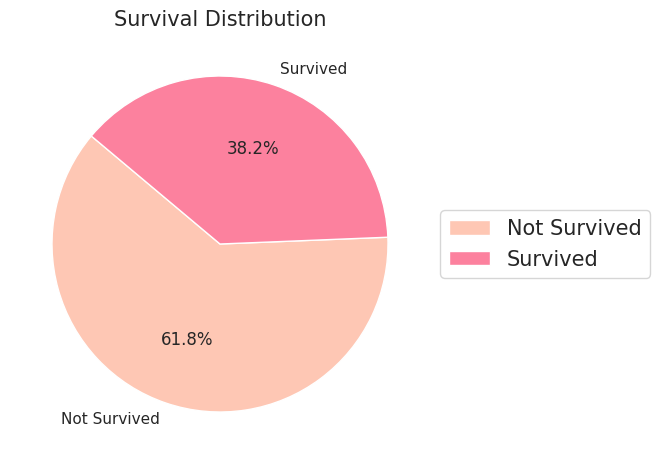

In [11]:
# Define colors
pink = '#FEC7B4'
dark_pink = '#FC819E'

df_viz = titanic.copy()

sns.set(style="whitegrid")

survived_counts = df_viz["Survived"].value_counts()
labels = ["Not Survived", "Survived"]
colors = [pink, dark_pink]

fig, axs = plt.subplots(figsize=(6, 6))
plt.pie(survived_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Survival Distribution', size=15)
plt.legend(labels, loc="center left", bbox_to_anchor=(1, 0.5), prop={'size': 15})
plt.subplots_adjust(left=0.1, right=0.8)
plt.show()

# 2) Pclass, Sex, and Embarked

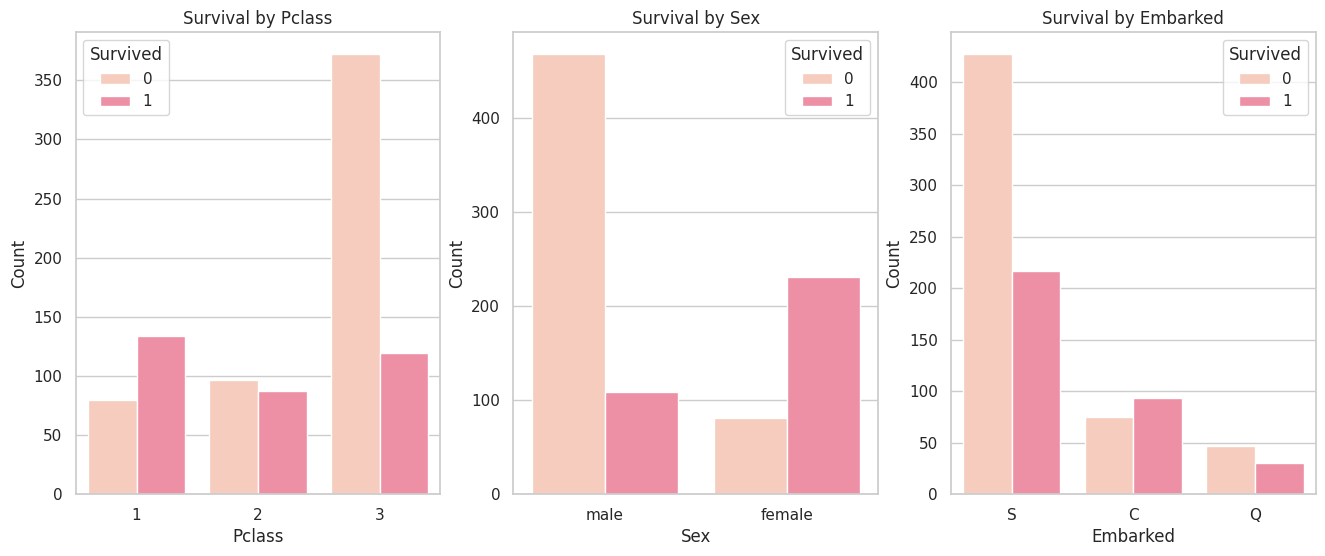

In [12]:
# Define colors
pink = '#FEC7B4'
dark_pink = '#FC819E'

sns.set(style="whitegrid")

fig, axs = plt.subplots(1, 3, figsize=(16,6))
colors = [pink, dark_pink]

sns.countplot(x="Pclass", hue="Survived", data=titanic, ax=axs[0], palette=colors)
axs[0].set_title("Survival by Pclass")
axs[0].set_xlabel("Pclass", size=12)
axs[0].set_ylabel("Count", size=12)
axs[0].legend(title="Survived", loc="upper left")

sns.countplot(x="Sex", hue="Survived", data=titanic, ax=axs[1], palette=colors)
axs[1].set_title("Survival by Sex")
axs[1].set_xlabel("Sex", size=12)
axs[1].set_ylabel("Count", size=12)
axs[1].legend(title="Survived", loc="upper right")

sns.countplot(x="Embarked", hue="Survived", data=titanic, ax=axs[2], palette=colors)
axs[2].set_title("Survival by Embarked")
axs[2].set_xlabel("Embarked", size=12)
axs[2].set_ylabel("Count", size=12)
axs[2].legend(title="Survived", loc="upper right")

plt.tight_layout
plt.show()

It appears that these three features are important in modeling.

# 3) Age

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


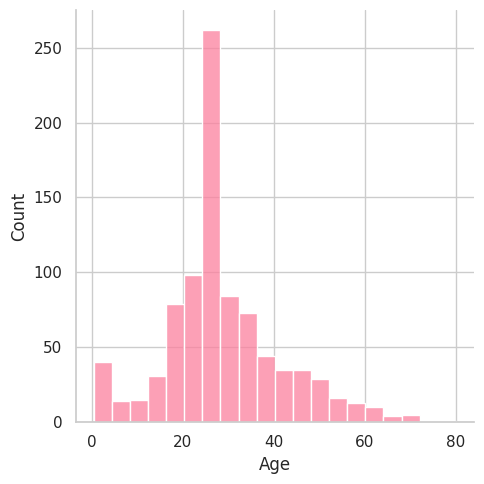

In [13]:
# Define colors
dark_pink = '#FC819E'

# Histogram with custom color
sns.displot(titanic, x='Age', bins=20, kind='hist', color=dark_pink)

# Survival rate by Age

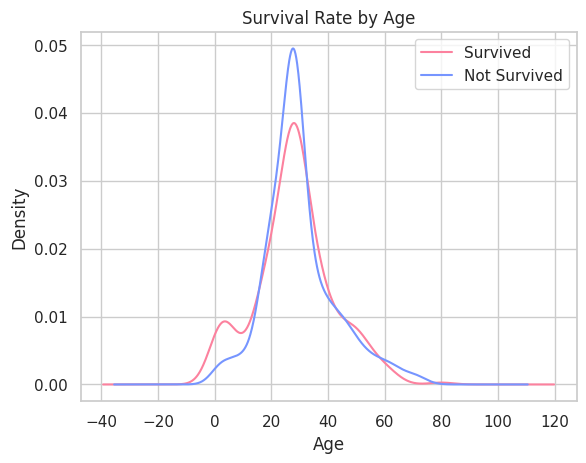

In [14]:
# Define colors
blue = '#7695FF'
dark_pink = '#FC819E'

# Plot KDE with custom colors
titanic[titanic['Survived'] == 1]['Age'].plot(kind='kde', color=dark_pink, label='Survived')
titanic[titanic['Survived'] == 0]['Age'].plot(kind='kde', color=blue, label='Not Survived')

# Add legend and show plot
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

# 4) Fare

/tmp/ipykernel_18/2711698002.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_18/2711698002.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


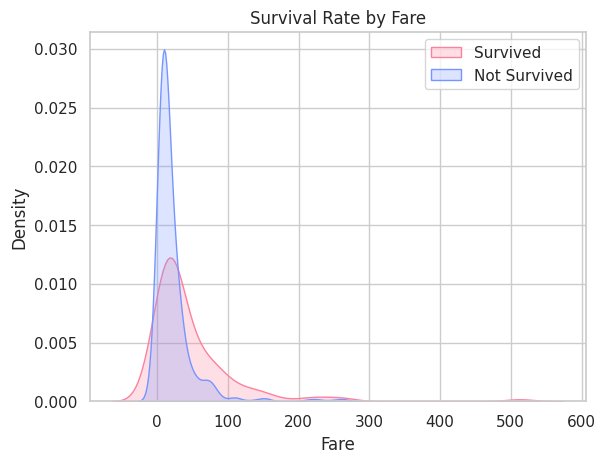

In [15]:
# Define colors
blue = '#7695FF'
dark_pink = '#FC819E'

# KDE plots with custom colors
sns.kdeplot(
    titanic[titanic['Survived'] == 1]['Fare'],
    shade=True,
    color=dark_pink,
    label='Survived'
)

sns.kdeplot(
    titanic[titanic['Survived'] == 0]['Fare'],
    shade=True,
    color=blue,
    label='Not Survived'
)

# Plot details
plt.title('Survival Rate by Fare')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend()

plt.show()

# Survival by Family

/tmp/ipykernel_18/956536384.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  titanic['Family'].loc[titanic['Family'] > 0] = 1
/tmp/ipykernel_18/956536384.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

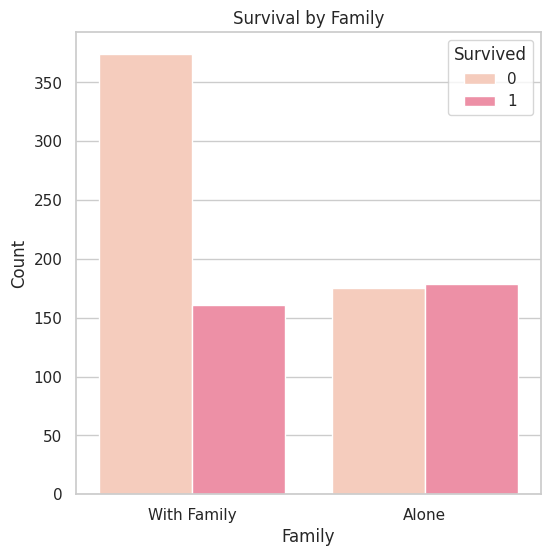

In [16]:
# Define colors
pink = '#FEC7B4'
dark_pink = '#FC819E'

sns.set(style="whitegrid")

titanic['Family'] = titanic["Parch"] + titanic["SibSp"]
titanic['Family'].loc[titanic['Family'] > 0] = 1
titanic['Family'].loc[titanic['Family'] == 0] = 0

test['Family'] = test["Parch"] + test["SibSp"]
test['Family'].loc[test['Family'] > 0] = 1
test['Family'].loc[test['Family'] == 0] = 0

fig, axs = plt.subplots(figsize=(6,6))
colors = [pink, dark_pink]

sns.countplot(x="Family", hue="Survived", data=titanic, ax=axs, palette=colors)
axs.set_title("Survival by Family")
axs.set_xlabel("Family", size=12)
axs.set_ylabel("Count", size=12)
axs.legend(title="Survived", loc="upper right")

axs.set_xticklabels(["With Family","Alone"], rotation=0)

plt.tight_layout
plt.show()

# FareGroup KDE

/tmp/ipykernel_18/1771664514.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_18/1771664514.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


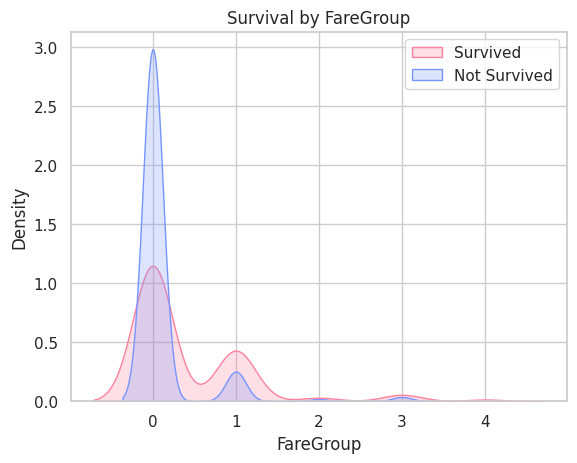

In [17]:
# Define colors
blue = '#7695FF'
dark_pink = '#FC819E'

def categorize_fare(fare):
    if fare <= 50:
        return 0
    elif fare <= 150:
        return 1
    elif fare <= 200:
        return 2
    elif fare <= 300:
        return 3
    else:
        return 4
    
titanic["FareGroup"] = titanic["Fare"].apply(categorize_fare)

sns.kdeplot(
    titanic[titanic['Survived'] == 1]['FareGroup'],
    shade=True,
    color=dark_pink,
    label='Survived'
)

sns.kdeplot(
    titanic[titanic['Survived'] == 0]['FareGroup'],
    shade=True,
    color=blue,
    label='Not Survived'
)

plt.title("Survival by FareGroup")
plt.xlabel("FareGroup")
plt.ylabel('Density')
plt.legend()

plt.show()

# FareGroup Histogram

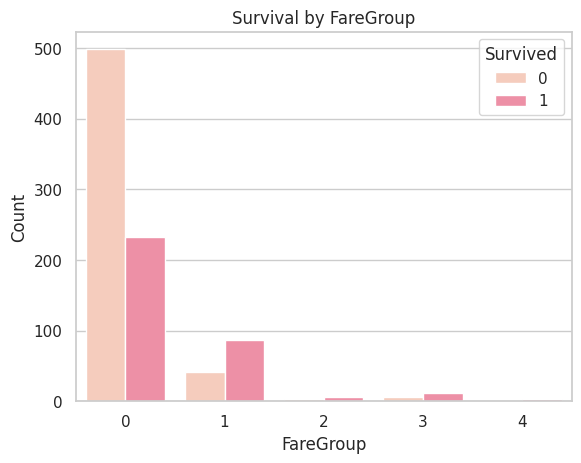

In [18]:
# Define colors
pink = '#FEC7B4'
dark_pink = '#FC819E'

colors = [pink, dark_pink]

# Meng-kategorikan fare
def categorize_fare(fare):
    if fare <= 50:
        return 0
    elif fare <= 150:
        return 1
    elif fare <= 200:
        return 2
    elif fare <= 300:
        return 3
    else:
        return 4

titanic["FareGroup"] = titanic["Fare"].apply(categorize_fare)

# Membuat diagram
sns.countplot(x="FareGroup", hue="Survived", data=titanic[titanic["Survived"].notnull()], palette=colors)
plt.title("Survival by FareGroup")
plt.xlabel("FareGroup")
plt.ylabel("Count")
plt.show()

# AgeGroup

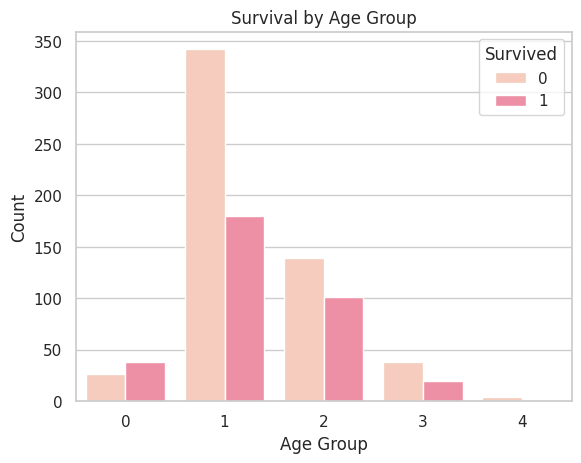

In [19]:
# Define colors
pink = '#FEC7B4'
dark_pink = '#FC819E'

colors = [pink, dark_pink]

# Meng-kategorikan umur
def categorize_age(age):
    if age <= 10:
        return 0
    elif age <= 30:
        return 1
    elif age <= 50:
        return 2
    elif age <= 70:
        return 3
    else:
        return 4

titanic["AgeGroup"] = titanic["Age"].apply(categorize_age)

# Membuat diagram
sns.countplot(x="AgeGroup", hue="Survived", data=titanic[titanic["Survived"].notnull()], palette=colors)
plt.title("Survival by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.show()

In [20]:
# Show data after categorizing
titanic_cleaned = titanic.copy()
titanic_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,FareGroup,AgeGroup
0,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,1,1,female,38.0,1,0,71.2833,C,1,1,2
2,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,1,1,female,35.0,1,0,53.1000,S,1,1,2
4,0,3,male,35.0,0,0,8.0500,S,0,0,2


# Feature Engineering

## Label Encoder for covert data to numeric values

In [21]:
# Import library label encoder
from sklearn.preprocessing import LabelEncoder

In [22]:
# Convert the 'Sex' and 'Embarked' columns into numeric values
le = LabelEncoder()
titanic_cleaned['Sex'] = le.fit_transform(titanic_cleaned['Sex'])
titanic_cleaned['Embarked'] = le.fit_transform(titanic_cleaned['Embarked'])

In [23]:
# Data after label encoding
titanic_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,FareGroup,AgeGroup
0,0,3,1,22.0,1,0,7.2500,2,1,0,1
1,1,1,0,38.0,1,0,71.2833,0,1,1,2
2,1,3,0,26.0,0,0,7.9250,2,0,0,1
3,1,1,0,35.0,1,0,53.1000,2,1,1,2
4,0,3,1,35.0,0,0,8.0500,2,0,0,2


## Feature Selection

In [24]:
# Create features for modelling
features = ['Pclass', 'Sex', 'Family','AgeGroup','FareGroup', 'Embarked']
X = titanic_cleaned[features]
y = titanic_cleaned['Survived']

In [25]:
X

,Pclass,Sex,Family,AgeGroup,FareGroup,Embarked
0,3,1,1,1,0,2
1,1,0,1,2,1,0
2,3,0,0,1,0,2
3,1,0,1,2,1,2
4,3,1,0,2,0,2
...,...,...,...,...,...,...
886,2,1,0,1,0,2
887,1,0,0,1,0,2
888,3,0,1,1,0,2
889,1,1,0,1,0,0


In [26]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

# Membuat correlation matrix dengan heatmap

In [27]:
# Create dataframe for confusion matrix
correlation = ['Pclass', 'Sex', 'Family','AgeGroup','FareGroup', 'Embarked','Survived']
df = titanic_cleaned[correlation]
df

,Pclass,Sex,Family,AgeGroup,FareGroup,Embarked,Survived
0,3,1,1,1,0,2,0
1,1,0,1,2,1,0,1
2,3,0,0,1,0,2,1
3,1,0,1,2,1,2,1
4,3,1,0,2,0,2,0
...,...,...,...,...,...,...,...
886,2,1,0,1,0,2,0
887,1,0,0,1,0,2,1
888,3,0,1,1,0,2,0
889,1,1,0,1,0,0,1


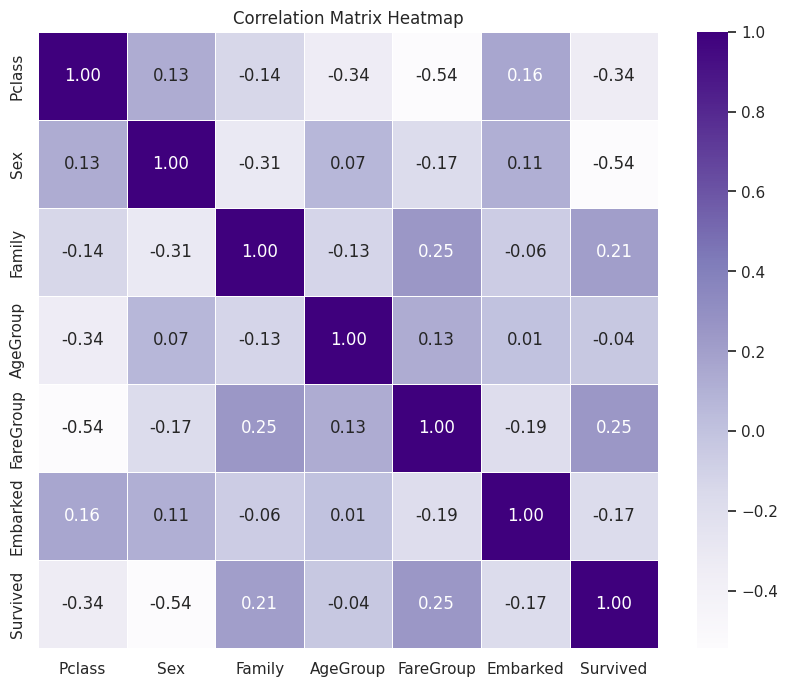

In [28]:
# Count correlation matrix
correlation_matrix = df.corr()

# Create heatmap
plt.figure(figsize=(10, 8))  # Ukuran plot
sns.heatmap(correlation_matrix, annot=True, cmap='Purples', fmt='.2f', linewidths=0.5)

# Add title
plt.title('Correlation Matrix Heatmap')
plt.show()

## Splitting data

In [29]:
# Import library for splitting data
from sklearn.model_selection import train_test_split

# Splitting data into train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train data

In [30]:
X_train

,Pclass,Sex,Family,AgeGroup,FareGroup,Embarked
708,1,0,0,1,2,2
240,3,0,1,1,0,0
382,3,1,0,2,0,2
792,3,0,1,1,1,2
683,3,1,1,1,0,2
...,...,...,...,...,...,...
107,3,1,0,1,0,2
271,3,1,0,1,0,2
862,1,0,0,2,0,2
436,3,0,1,1,0,2


In [31]:
y_train

708    1
240    0
382    0
792    0
683    0
      ..
107    1
271    1
862    1
436    0
103    0
Name: Survived, Length: 711, dtype: int64

### Test data

In [32]:
X_test

,Pclass,Sex,Family,AgeGroup,FareGroup,Embarked
281,3,1,0,1,0,2
435,1,0,1,1,1,2
39,3,0,1,1,0,0
418,2,1,0,1,0,2
585,1,0,1,1,1,2
...,...,...,...,...,...,...
433,3,1,0,1,0,2
807,3,0,0,1,0,2
25,3,0,1,2,0,2
85,3,0,1,2,0,2


In [33]:
y_test

281    0
435    1
39     1
418    0
585    1
      ..
433    0
807    0
25     1
85     1
10     1
Name: Survived, Length: 178, dtype: int64

# Modeling & Evaluation

In [34]:
#Import library for evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Logistic Regression

In [35]:
# Importing packages LogisticRegression
from sklearn.linear_model import LogisticRegression

# Create Logistic Regression model
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [36]:
# Make a prediction using test data
y_pred1 = lr.predict(X_test)

In [37]:
# Create dataframe for the result of prediction
df_comparison1 = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred1
})
df_comparison1

,Actual,Predicted
281,0,0
435,1,1
39,1,1
418,0,0
585,1,1
...,...,...
433,0,0
807,0,1
25,1,0
85,1,0


In [38]:
# Show classification report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       109
           1       0.69      0.77      0.73        69

    accuracy                           0.78       178
   macro avg       0.76      0.77      0.77       178
weighted avg       0.78      0.78      0.78       178



In [39]:
# Show confusion matrix
print(confusion_matrix(y_test, y_pred1))

[[85 24]
 [16 53]]


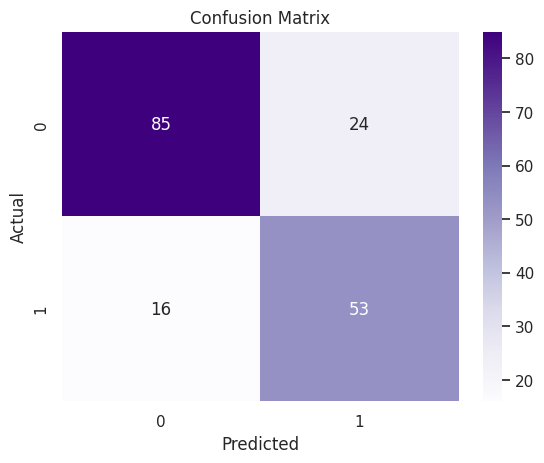

In [40]:
# Visualitation confusion matrix with heatmap
conf_matrix = pd.crosstab(df_comparison1['Actual'], df_comparison1['Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [41]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred1)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.78


# Random Forest

In [42]:
# Import library Random Forest
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

- n_estimators menentukan jumlah pohon (trees) yang akan dibuat dalam Random Forest. Ketika kita set n_estimators=100, ini berarti kita akan membuat 100 pohon keputusan (decision trees) yang berbeda. Setiap pohon akan membuat prediksi, dan hasil akhir adalah kombinasi dari semua prediksi pohon tersebut.
- random_state adalah angka yang digunakan untuk mengatur "benih" acak (random seed). Penggunaan random_state memastikan bahwa hasil yang kita dapatkan dari menjalankan model selalu konsisten. Misalnya, setiap kali kita menjalankan kode dengan random_state=42, hasilnya akan sama.

In [43]:
# Make a prediction with test data
y_pred2 = model.predict(X_test)

In [44]:
# Create dataframe for the result of prediction
df_comparison2 = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred2
})
df_comparison2

,Actual,Predicted
281,0,0
435,1,1
39,1,1
418,0,0
585,1,1
...,...,...
433,0,0
807,0,0
25,1,0
85,1,0


In [45]:
# Show classification report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       109
           1       0.75      0.71      0.73        69

    accuracy                           0.80       178
   macro avg       0.79      0.78      0.78       178
weighted avg       0.80      0.80      0.80       178



In [46]:
# Show evaluation results
conf_matrix = confusion_matrix(y_test, y_pred2)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[93 16]
 [20 49]]


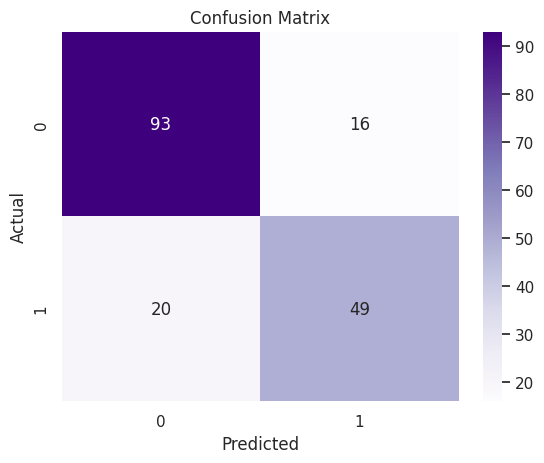

In [47]:
# Visualitation confusion matrix with heatmap
conf_matrix = pd.crosstab(df_comparison2['Actual'], df_comparison2['Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [48]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.80


## Feature importances (just for random forest)

In [49]:
feature_importance = model.feature_importances_

feature_names = X_train.columns

df_feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False)
df_feature_importance

,Feature,Importance
1,Sex,0.448647
0,Pclass,0.192131
3,AgeGroup,0.134454
4,FareGroup,0.088451
5,Embarked,0.084315
2,Family,0.052002


# Decision Tree

In [50]:
# Import library Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [51]:
# Create Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [52]:
# Make a prediction using test data
y_pred3 = model.predict(X_test)

In [53]:
# Create dataframe for the result of prediction
df_comparison3 = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred3
})
df_comparison3

,Actual,Predicted
281,0,0
435,1,1
39,1,1
418,0,0
585,1,1
...,...,...
433,0,0
807,0,0
25,1,0
85,1,0


In [54]:
# Show classification report
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       109
           1       0.77      0.71      0.74        69

    accuracy                           0.80       178
   macro avg       0.80      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



In [55]:
# Show the result of evaluation
conf_matrix = confusion_matrix(y_test, y_pred3)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[94 15]
 [20 49]]


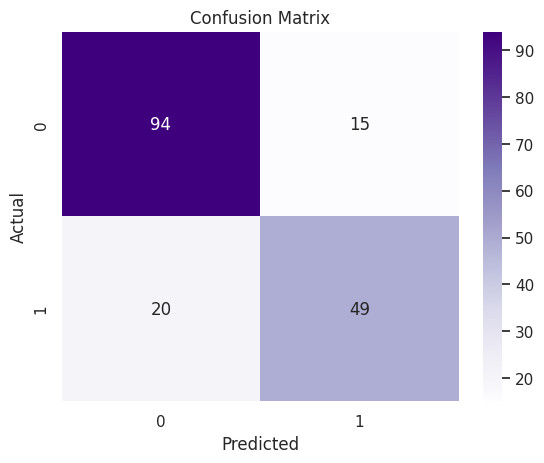

In [56]:
# Visualitation confusion matrix with heatmap
conf_matrix = pd.crosstab(df_comparison3['Actual'], df_comparison3['Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [57]:
# Model evaluation
accuracy = accuracy_score(y_test, y_pred3)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.80


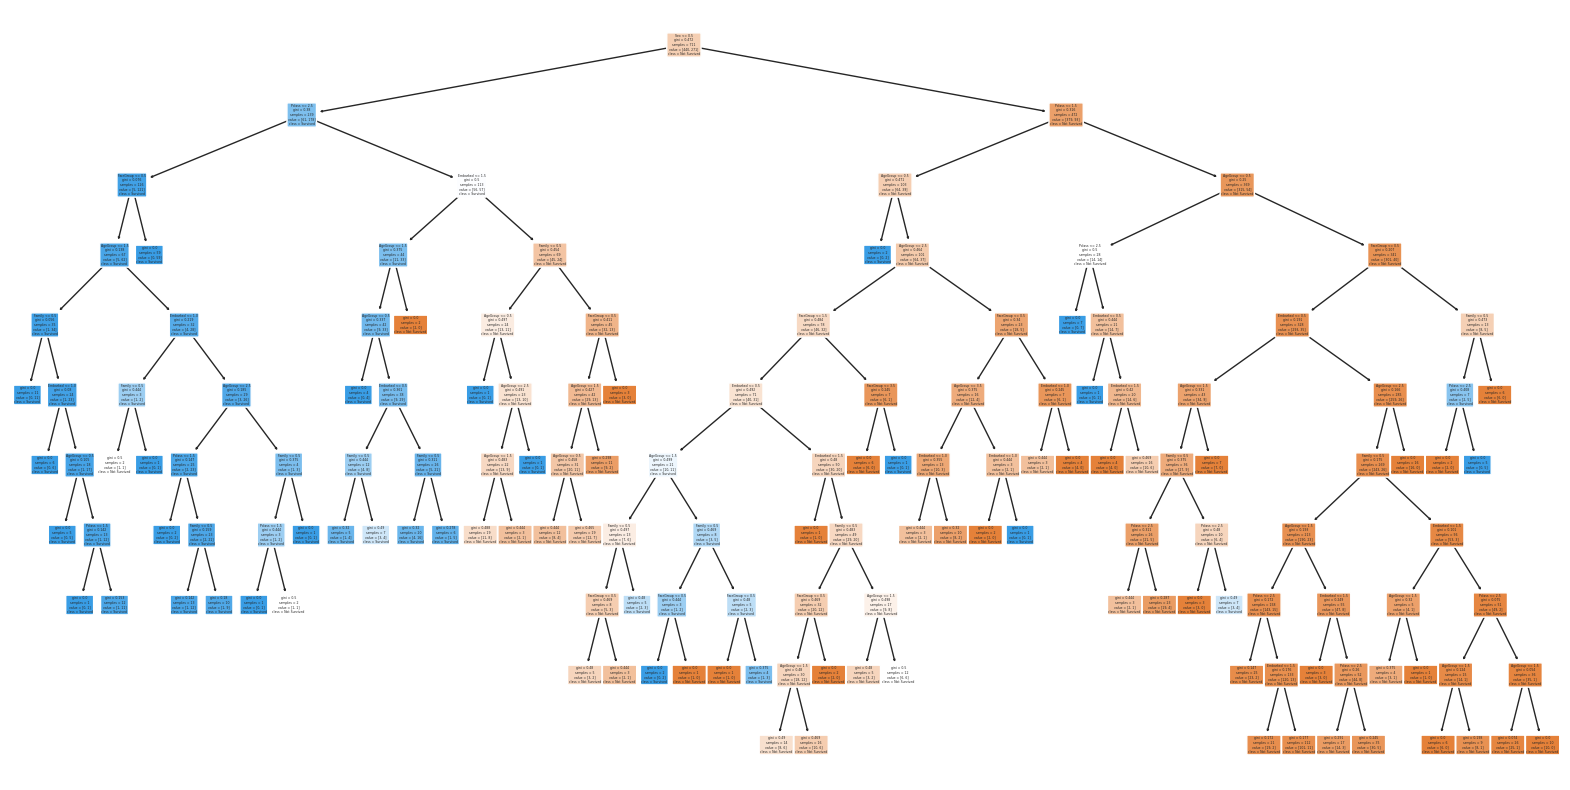

In [58]:
# Optional: Show visualitation decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'], rounded=True)
plt.show()

# ROC Curve

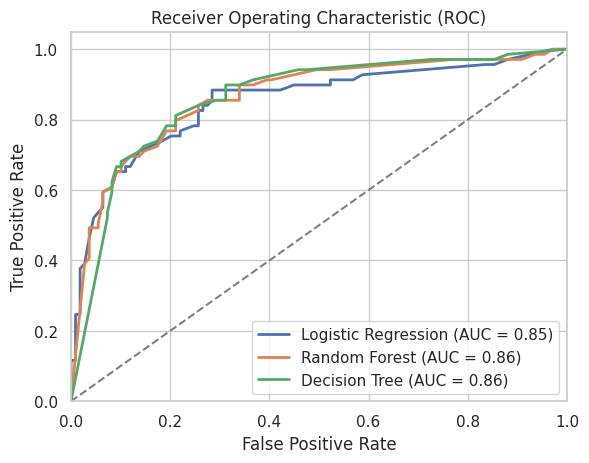

In [59]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

# Create model
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# Plot ROC Curve for each model
plt.figure()

for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    
    # Probability prediction
    y_pred1 = model.predict_proba(X_test)[:, 1]
    y_pred2 = model.predict_proba(X_test)[:, 1]
    y_pred3 = model.predict_proba(X_test)[:, 1]
    
    # Count ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred1)
    roc_auc = roc_auc_score(y_test, y_pred1)
    fpr, tpr, _ = roc_curve(y_test, y_pred2)
    roc_auc = roc_auc_score(y_test, y_pred2)
    fpr, tpr, _ = roc_curve(y_test, y_pred3)
    roc_auc = roc_auc_score(y_test, y_pred3)
    
    # Plot ROC Curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot detail
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()